## Analyzing Google Play Store Apps and Reviews

Mobile apps have become ubiquitous, offering both convenience and lucrative opportunities. With the ever-growing number of apps, understanding the Android market is vital. In this project, we'll analyze over ten thousand apps on Google Play across diverse categories to uncover insights for driving growth and retention.

### Data Overview:

The dataset comprises two files:

1. **apps.csv**: Contains detailed information about Google Play applications, including 13 descriptive features.

2. **user_reviews.csv**: Contains 100 reviews for each app, sorted by helpfulness. Each review has been pre-processed and includes Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity.

By exploring these datasets, we aim to extract actionable insights to inform strategic decisions in the dynamic Android app market.


## 1. Importing Libraries

In [1]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

## 2. Exploring the dataset

In [2]:
file_path = 'datasets/apps.csv'

In [3]:
# Read in dataset
apps_with_duplicates = pd.read_csv(file_path)

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',apps['App'].value_counts().sum())

# Have a look at a random sample of 5 rows
print(apps.head(5))

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1 

In [4]:
# Display the Play Store App data
play_store=pd.concat([apps.head(),apps.tail()])
play_store

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [6]:
# Finding the number of rows and columns in the given dataset
print(apps.columns)
rows=apps.shape[0]
columns=apps.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')
the no of rows is 9659 and no of columns is 14


In [7]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


## 3. Data Cleaning

Data cleaning is essential for any data science project to ensure accuracy and reliability.

We observed that the `Installs` column contains special characters like `,` and `+`, while the `Price` column contains `$`, hindering their use in calculations. We'll remove these characters to make the columns purely numeric.

After cleaning, we'll use the `info()` method to summarize the dataframe.


In [8]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char,''))
        
# Print a summary of the apps dataframe
print(apps.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type Price Content Rating  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free     0       Everyone   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free     0       Everyone   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free     0       Everyone   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free     0           Teen   
4  ART_AND_DESIGN     4.3      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Jan

## 4. Handling Null Values

Addressing null values, also known as missing values, is a critical aspect of data preprocessing in any data analysis or machine learning project.

Upon inspection of our dataset, we identified instances where certain fields lack data. These null values can adversely affect the accuracy and reliability of our analyses and models. Therefore, it's imperative to handle them appropriately.

We will employ various strategies to manage null values, such as:

1. **Imputation**: Replace null values with a suitable estimate, such as the mean, median, or mode of the respective column.
  
2. **Dropping Rows or Columns**: If null values are pervasive or cannot be imputed accurately, we may opt to remove entire rows or columns containing null values.
  
3. **Forward or Backward Fill**: For time-series data, we can fill null values with the preceding or succeeding valid value.

4. **Domain-specific Methods**: Depending on the context of the data, domain-specific knowledge or techniques may be applied to handle null values effectively.

After implementing these strategies, we'll validate the integrity of our dataset using methods like `isnull()` or `info()` to ensure that null values have been appropriately handled.


In [9]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=apps.columns)
  temp["datatype"]=apps.dtypes
  temp["not null values"]=apps.count()
  temp["null value"]=apps.isnull().sum()
  temp["% of the null value"]=apps.isnull().mean()
  temp["unique count"]=apps.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
Unnamed: 0,int64,9659,0,0.000000,9659
App,object,9659,0,0.000000,9659
Category,object,9659,0,0.000000,33
Rating,float64,8196,1463,0.151465,39
Reviews,int64,9659,0,0.000000,5330
Size,float64,8432,1227,0.127032,191
Installs,object,9659,0,0.000000,20
Type,object,9659,0,0.000000,2
Price,object,9659,0,0.000000,92
Content Rating,object,9659,0,0.000000,6


### 4.1 Removing null values from Android Ver

In [10]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
apps=apps[apps['Android Ver'].notna()]
# Shape of the updated dataframe
apps.shape

(9657, 14)

### 4.2 Removing null values from Current Ver

In [11]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
apps=apps[apps["Current Ver"].notna()]
# Shape of the updated dataframe
apps.shape

(9649, 14)

### 4.3 Removing null values from Ratings

In [12]:
# The rows containing NaN values in the Rating column
apps[apps['Rating'].isnull()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
123,123,Manicure - nail design,BEAUTY,NaN,119,3.7,50000,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,100000,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,10000,Free,0,Mature 17+,Beauty,"August 8, 2017",2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642,10824,Cardio-FR,MEDICAL,NaN,67,82.0,10000,Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
9643,10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7,100,Free,0,Teen,Social,"February 2, 2018",1,4.0 and up
9649,10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
9653,10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


* The `Rating` column contains 1463 NaN values which accounts to apprximately 15.14% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [13]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(apps[~apps['Rating'].isnull()]['Rating'].mean(),4)

median_rating = apps[~apps['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1733, 4.3]

In [15]:
# Replacing the NaN values in the 'Rating' colunm with its median value
apps['Rating'].fillna(value=median_rating,inplace=True)

## 5. Correcting Data Types

In the previous task, we observed that the `Installs` and `Price` columns were categorized as `object` data types instead of `int` or `float`, due to mixed input types.

To facilitate analysis, we need to correct the data types of these columns to make them numeric. Specifically, we will focus on `Installs` and `Price`.

We will:

1. Remove non-numeric characters from these columns.
2. Convert the modified columns to numeric types.

Once corrected, we can proceed confidently with our analysis, leveraging the numerical properties of the data.



In [20]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float')

# Checking dtypes of the apps dataframe
print(apps.dtypes)

apps

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [21]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,9649.000000,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,5666.195046,4.192476,2.168145e+05,20.413987,7.785404e+06,1.100079
std,3102.544662,0.496528,1.832255e+06,21.833096,5.378557e+07,16.860857
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3111.000000,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,5813.000000,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,8329.000000,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## 6. Exploring App Categories

With over 1 billion active users in 190 countries, Google Play remains a crucial platform for app distribution, allowing businesses to reach a global audience. Google has introduced the concept of grouping apps into categories to enhance the search experience and make apps more discoverable.

This leads us to the following questions:

- Which category holds the largest share of active apps in the market?
- Is there any specific category dominating the market?
- Which categories have the fewest number of apps?

Our dataset contains 33 unique app categories. Notably, "Family" and "Game" apps exhibit the highest market prevalence. Interestingly, categories such as "Tools," "Business," and "Medical" also hold significant positions in the market landscape.


In [22]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)


Number of categories =  33


Text(0.5, 1.0, 'Total app installs in each category')

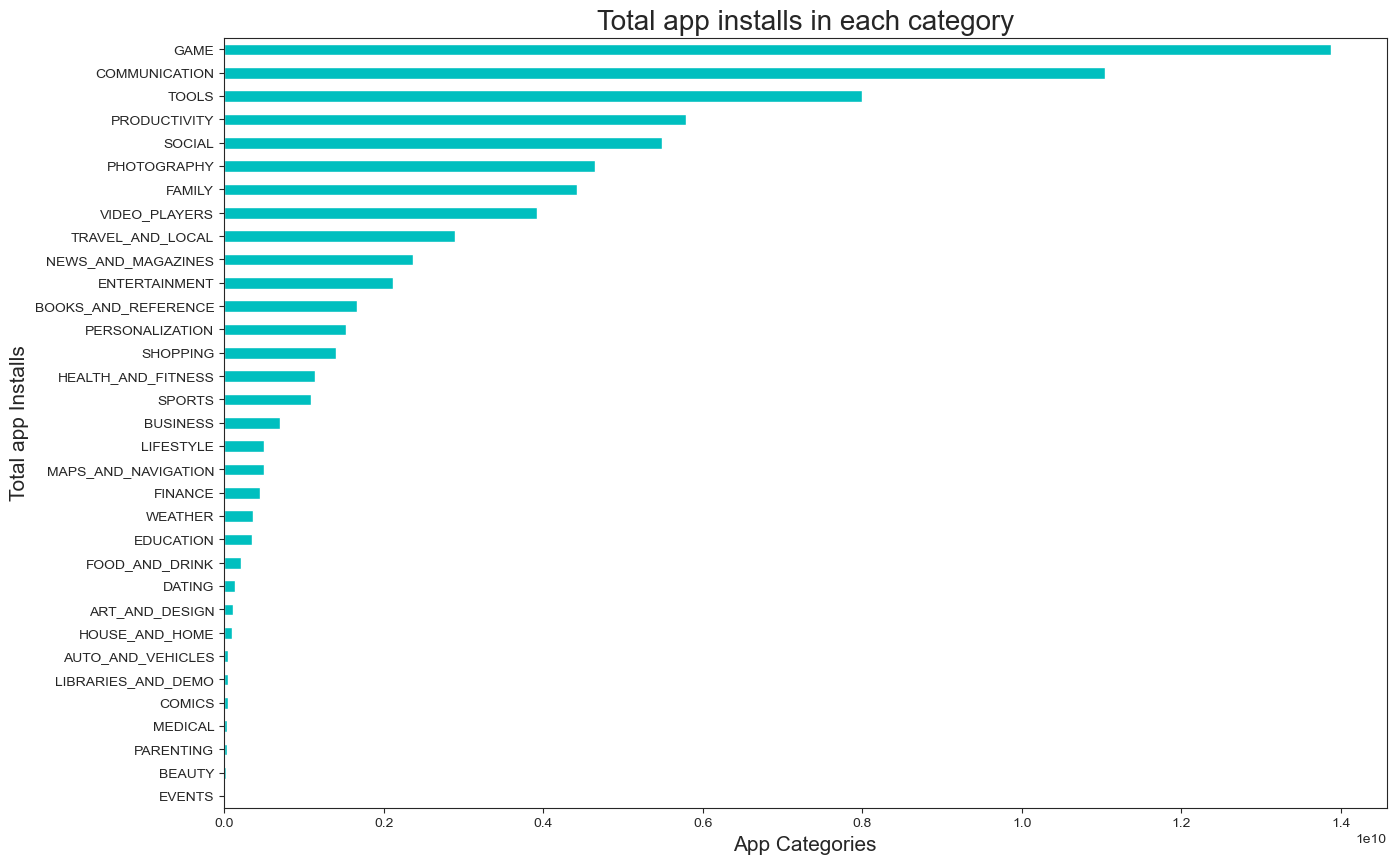

In [35]:
# total app installs in each category of the play store

a = apps.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

In [38]:
def findtop10incategory(str):
    str = str.upper()
    top10 = apps[apps['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

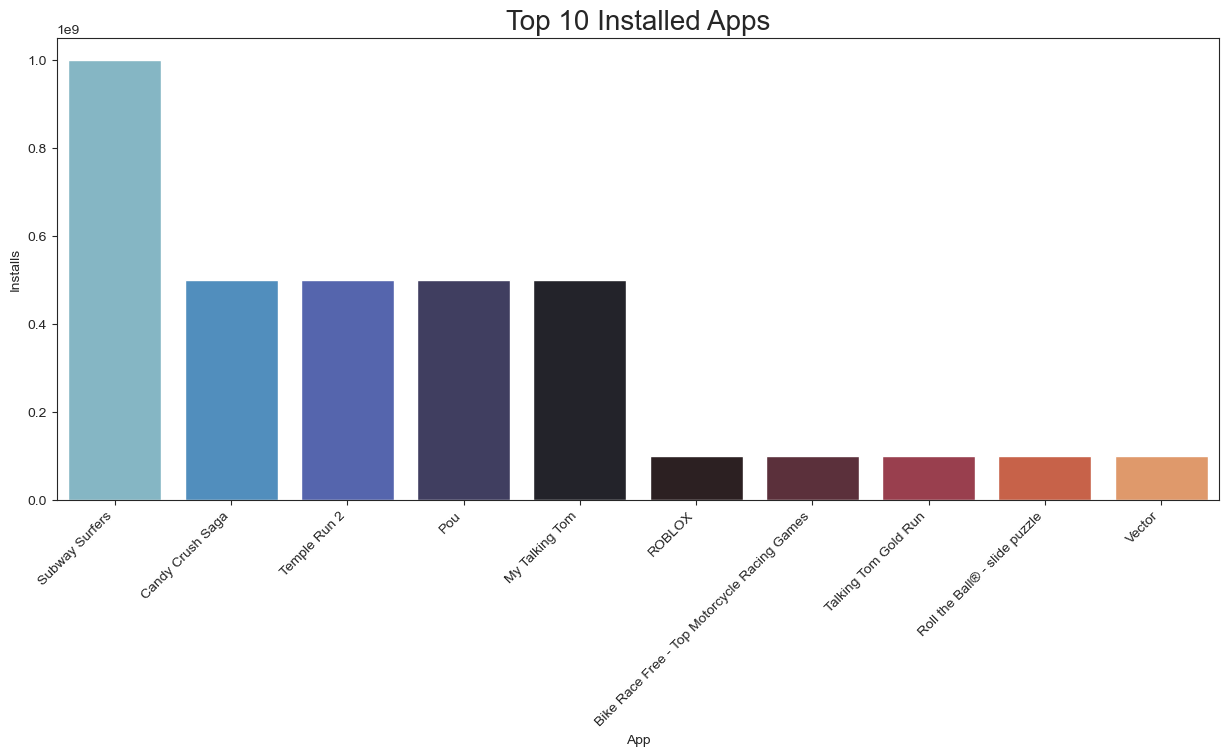

In [39]:
findtop10incategory('GAME')

## 7. Distribution of App Ratings

App ratings, ranging from 1 to 5, significantly influence app discoverability, conversion rates, and overall brand image. They serve as a key performance indicator for app success.

Upon analysis, we found that the average rating volume across all app categories is 4.17. The histogram plot illustrates a left-skewed distribution, indicating that the majority of apps receive high ratings, with only a few exceptions of low-rated apps.


In [5]:
# Average rating of apps
avg_app_rating =apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 8. Size and Price of an App

App size and price are crucial factors that impact user experience and app adoption. Large app sizes can deter users due to lengthy download times and limited device storage, especially in regions with slow internet speeds or lower earning power.

To formulate effective strategies for sizing and pricing our app, we need to address the following questions:

- Does the size of an app affect its rating?
- Do users prefer lightweight apps over system-heavy ones?
- Does the price of an app influence its rating?
- Are users more inclined towards free apps or paid ones?

Our analysis reveals that the majority of top-rated apps (with ratings over 4) typically range from 2 MB to 20 MB in size. Additionally, a significant portion of apps are priced under $10, indicating a preference for affordable pricing among users.


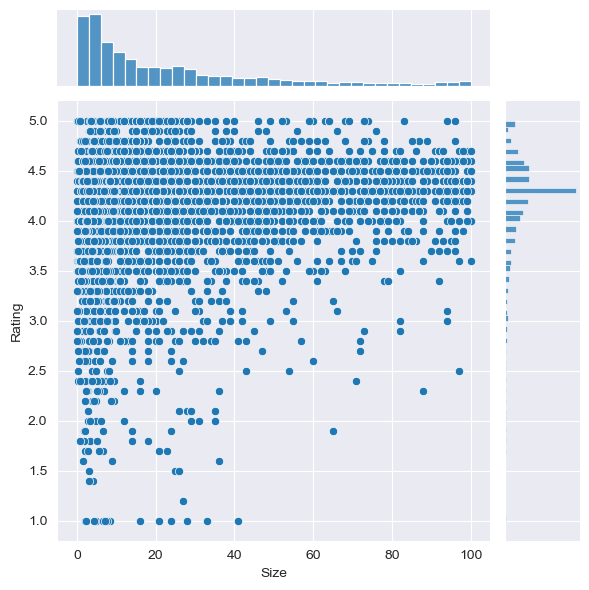

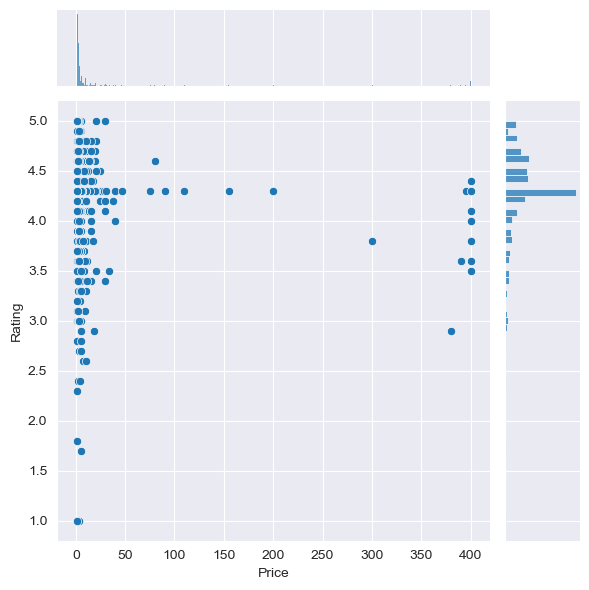

In [23]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(apps['Rating'].isna()==False)&(apps['Size'].isna()==False)]

# # Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# # Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# # Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# # Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps['Rating'])

## 9. Relation between App Category and App Price

Monetization strategies play a crucial role in sustaining companies and developers in the competitive app market. App costs are determined by factors such as features, complexity, and platform. Selecting the right pricing strategy is essential, considering the willingness of customers to pay and avoiding potential deterrents to app adoption.

Different categories of apps demand different price ranges, reflecting their perceived value and target audience preferences. While simple, everyday apps like calculators may be best kept free to maximize user adoption, highly specialized apps, such as medical diagnostic tools, may justify higher price points.

Our analysis reveals that medical and family-oriented apps tend to be the most expensive, with some medical apps priced as high as $80. In contrast, game apps are generally more affordable, with most priced below $20. Understanding the pricing dynamics within each app category is crucial for optimizing revenue and user satisfaction.


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


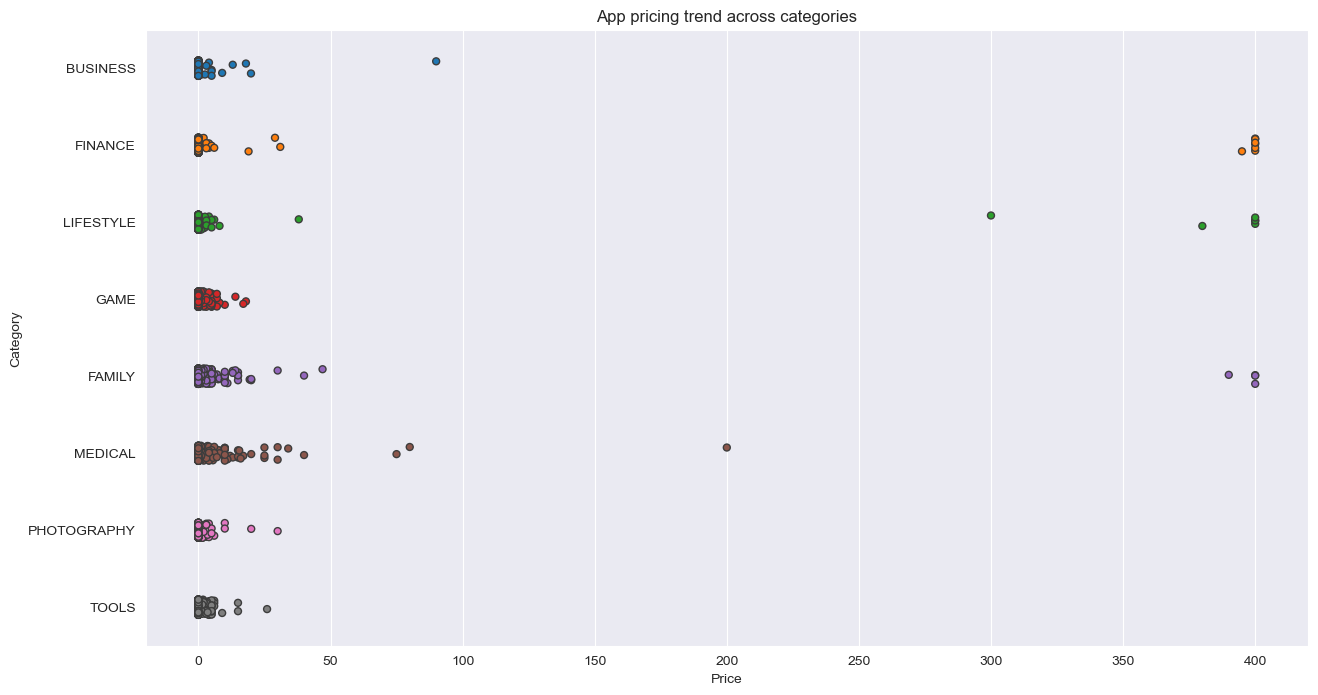

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

### Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

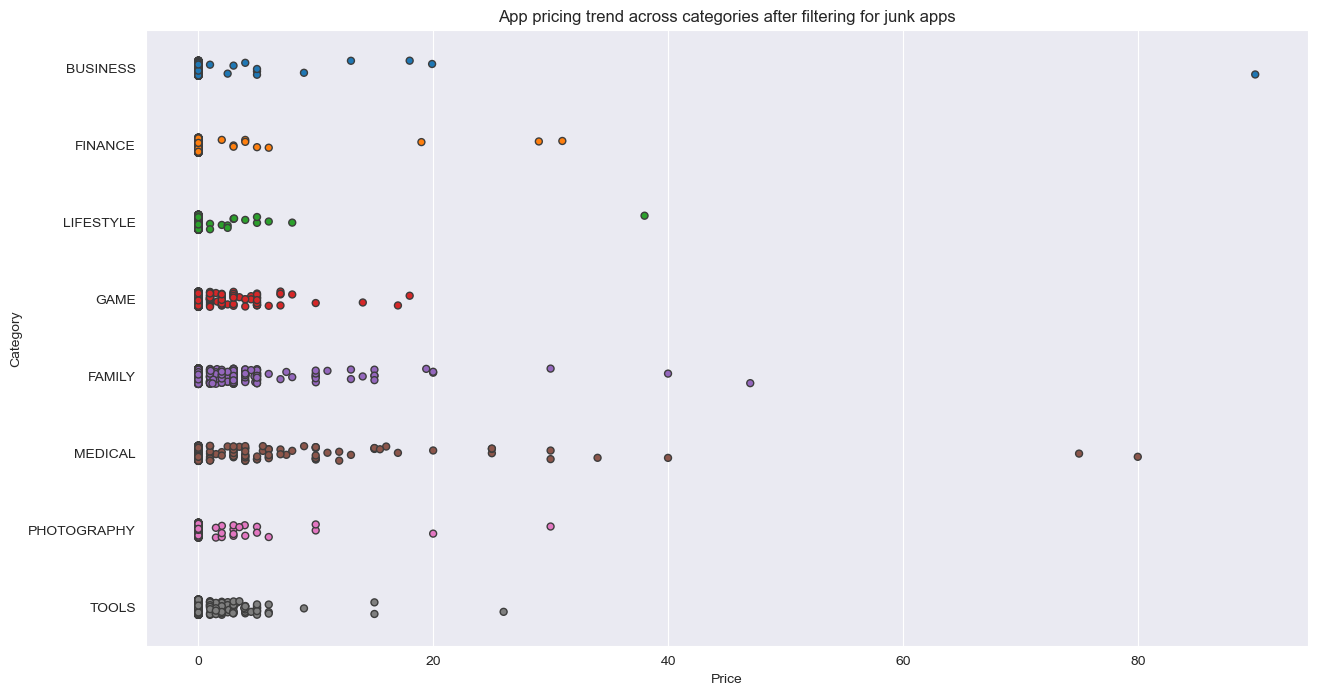

In [25]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 10. Popularity of Paid Apps vs Free Apps

In the Play Store, apps typically employ one of five pricing strategies: free, freemium, paid, paymium, and subscription. For our analysis, we'll focus on free and paid apps exclusively.

Characteristics of free apps include:

- Free to download.
- Primary source of income often derives from advertisements.
- Often developed by companies with other products, with the app serving as an extension of those products.
- Can be utilized for customer retention, communication, and customer service.

On the other hand, characteristics of paid apps include:

- Users are required to pay once to download and use the app.
- Users may not have a chance to try the app before purchasing it.

In terms of installation rates, paid apps tend to have lower install counts compared to free apps. However, the disparity between the two is not as pronounced as one might expect.


In [26]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 11. Data Visualization on play store data:

### Correlation

In [28]:
# Finding correlation between different columns in the play store data
apps.corr()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
Unnamed: 0,1.000000,-0.093021,-0.096735,-0.091915,-0.120112,0.003197
Rating,-0.093021,1.000000,0.050212,0.045533,0.034306,-0.018674
Reviews,-0.096735,0.050212,1.000000,0.179276,0.625158,-0.007603
Size,-0.091915,0.045533,0.179276,1.000000,0.134216,-0.022488
Installs,-0.120112,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,0.003197,-0.018674,-0.007603,-0.022488,-0.009412,1.000000


In [33]:
#Removing Unnamed column from play store data
apps_data = apps.drop(apps.columns[0], axis = 1)
apps_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.045533,0.034306,-0.018674
Reviews,0.050212,1.000000,0.179276,0.625158,-0.007603
Size,0.045533,0.179276,1.000000,0.134216,-0.022488
Installs,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.022488,-0.009412,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

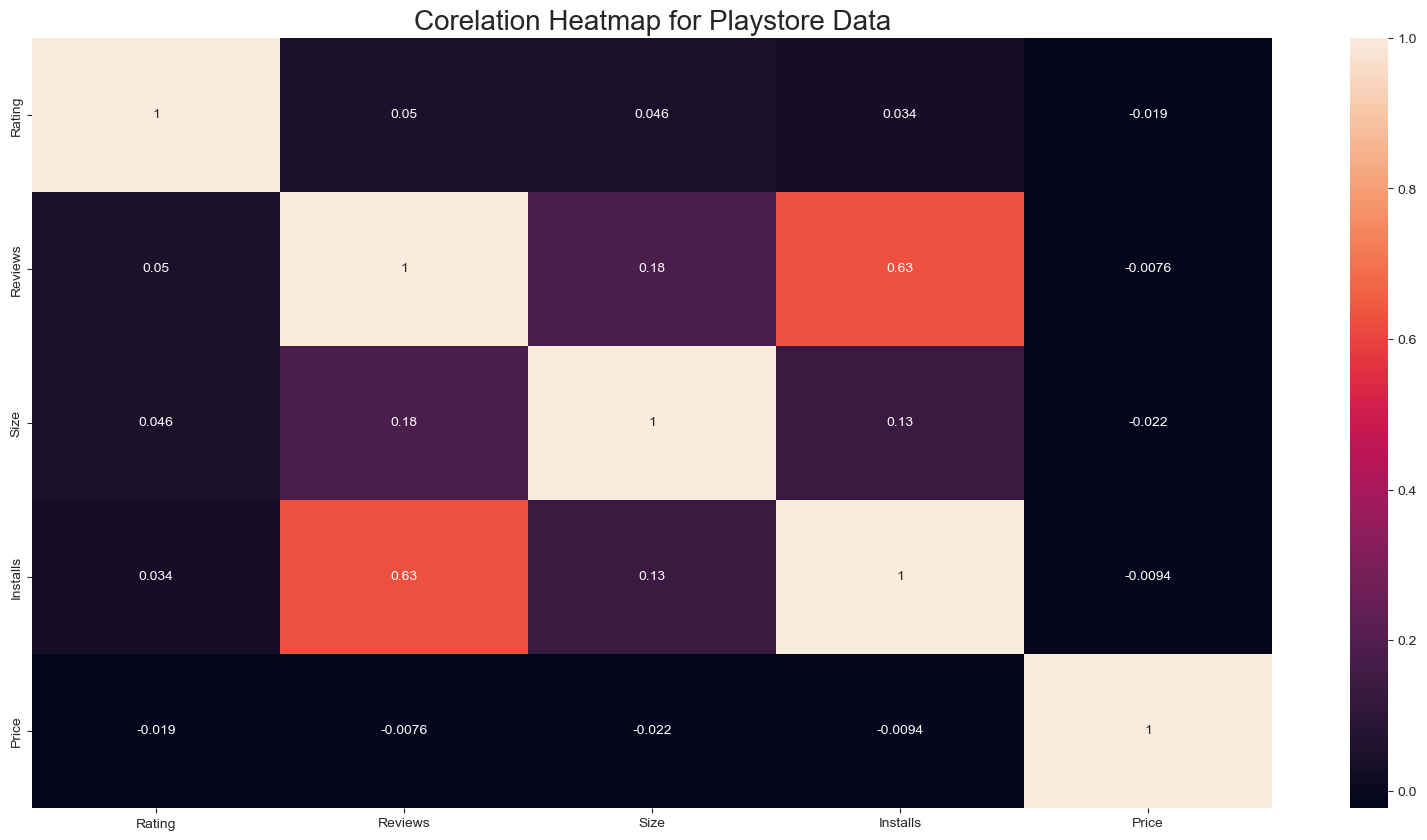

In [34]:
# Heat map for apps_data
plt.figure(figsize = (20,10))
sns.heatmap(apps_data.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

* There is a strong positive correlation between the `Reviews` and `Installs` columns, which is expected. Higher numbers of installs generally lead to a larger user base, resulting in more reviews being posted by users.

* The `Price` column exhibits a slight negative correlation with `Rating`, `Reviews`, and `Installs`. This suggests that as the price of the app increases, there is a slight decrease in the average rating, total number of reviews, and number of installs.

* The `Rating` column shows a slight positive correlation with the `Installs` and `Reviews` columns. This indicates that as the average user rating increases, there is a tendency for both app installs and the number of reviews to increase as well.


## 12. Sentiment Analysis of User Reviews

Sentiment analysis involves mining user review data to gauge the sentiment towards a product, brand, or service. By analyzing user reviews for apps, we can determine whether the overall mood is positive, negative, or neutral.

Positive words in app reviews may include terms like 'amazing', 'friendly', 'good', 'great', and 'love', while negative words might include 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

Plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps tend to receive more negative comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps, on the other hand, rarely exhibit extreme negativity. This suggests a potential difference in app quality, with paid apps generally perceived as higher quality than free apps. The median polarity score for paid apps is slightly higher than that of free apps, reinforcing this observation.

In this analysis, we explored over ten thousand apps from the Google Play Store. These findings can inform decision-making processes, particularly for individuals interested in developing their own apps.


In [40]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

In [41]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

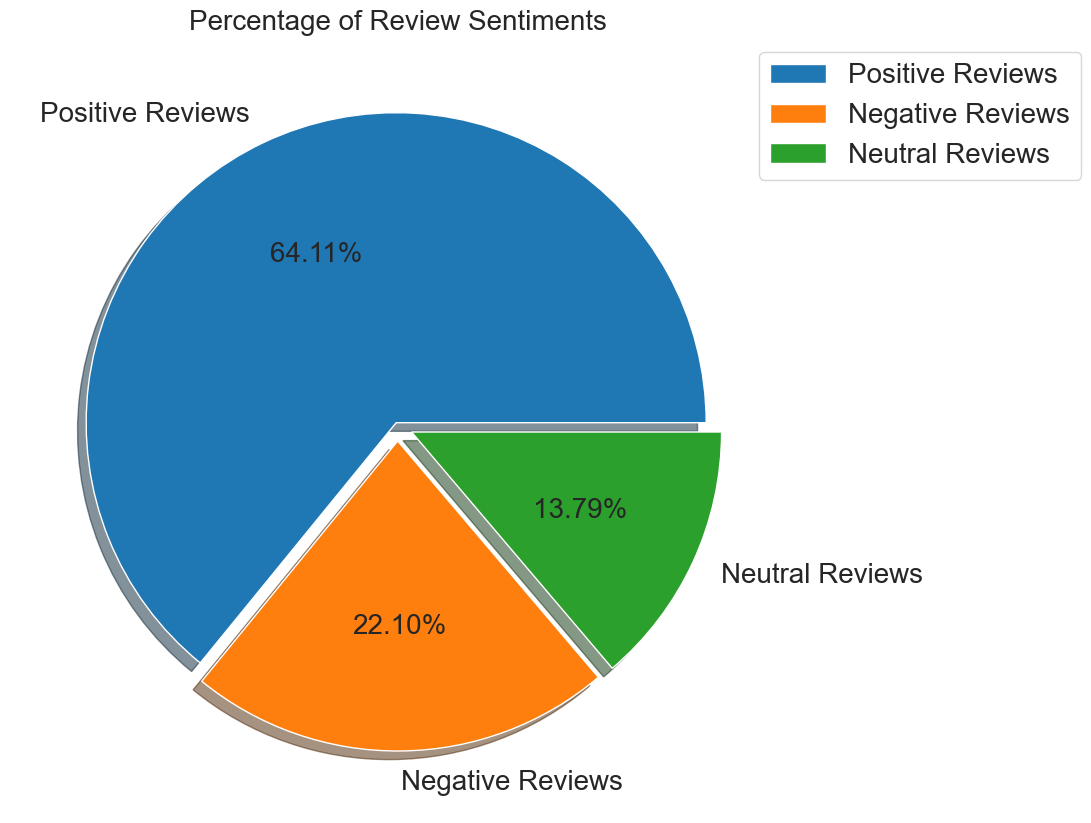

In [42]:
import matplotlib
counts = list(reviews_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

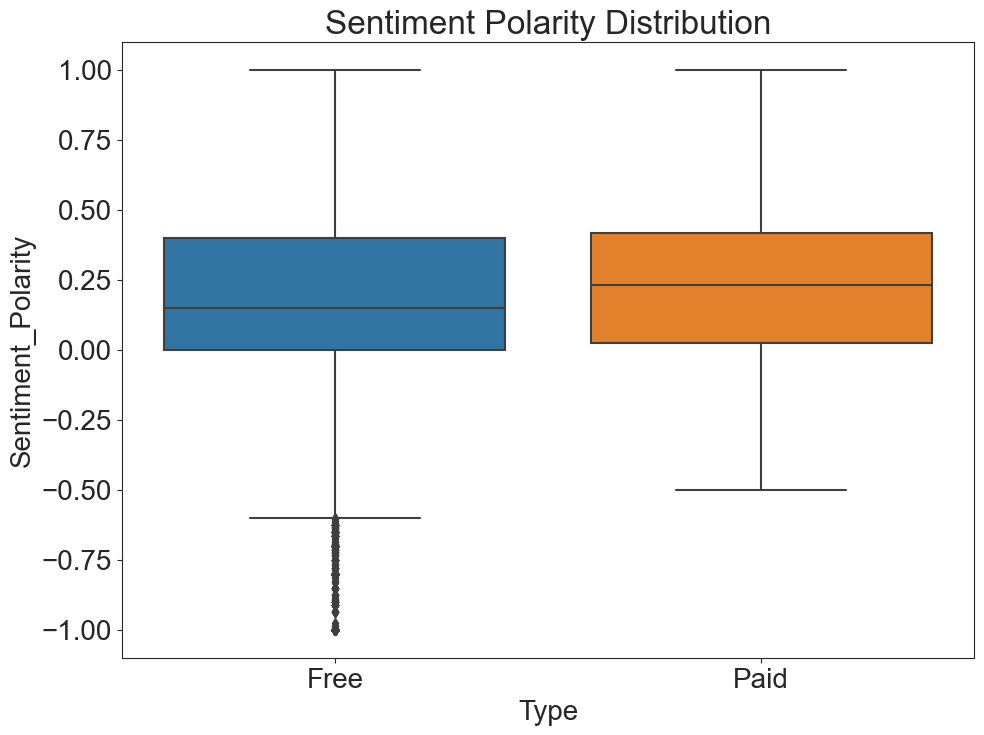

In [43]:
# Join the two dataframes
merged_df = apps.merge(reviews_df,on="App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Reviews'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity' , data = merged_df)
ax.set_title('Sentiment Polarity Distribution')